In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras import utils, optimizers, regularizers

Делим наш датасет на обучающую и тестовую выборку

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

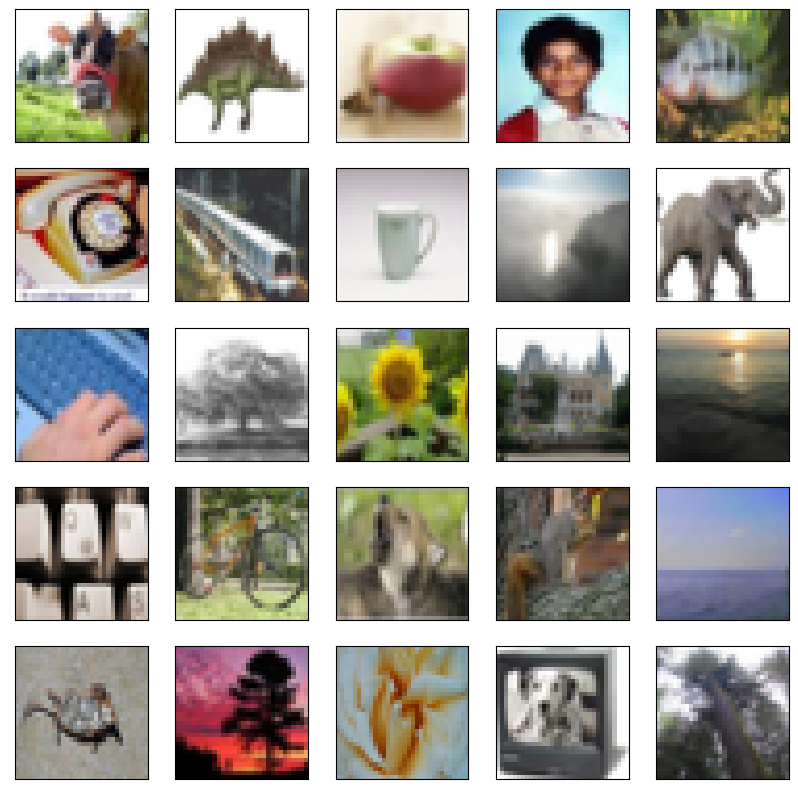

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [4]:
print('train_images: ', train_images.shape)
print('test_images: ', test_images.shape)
print('train_labels: ', train_labels.shape)
print('test_labels: ', test_labels.shape)

train_images:  (50000, 32, 32, 3)
test_images:  (10000, 32, 32, 3)
train_labels:  (50000, 1)
test_labels:  (10000, 1)


Нормализация данных

In [5]:
train_labels = utils.to_categorical(train_labels, 100)
test_labels = utils.to_categorical(test_labels, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

In [6]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

создание модели нейронной сети

In [7]:
dropP = 0.7

model = Sequential()

model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropP))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.L2(1e-4)))
model.add(Activation('relu'))
model.add(Dropout(dropP))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 128)       0

Компиляция модели

In [8]:
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [9]:
epochs = 50
batch_size = 64

hist = model.fit(train_images, train_labels, batch_size=batch_size, validation_data=(test_images, test_labels),
                 epochs=epochs)

Epoch 1/50
782/782 [==============================] - 22s 25ms/step - loss: 4.5378 - accuracy: 0.0425 - val_loss: 4.2575 - val_accuracy: 0.0691
Epoch 2/50
782/782 [==============================] - 19s 25ms/step - loss: 4.0707 - accuracy: 0.0865 - val_loss: 4.2672 - val_accuracy: 0.0782
Epoch 3/50
782/782 [==============================] - 19s 24ms/step - loss: 3.8852 - accuracy: 0.1162 - val_loss: 3.7988 - val_accuracy: 0.1361
Epoch 4/50
782/782 [==============================] - 19s 25ms/step - loss: 3.7856 - accuracy: 0.1396 - val_loss: 3.4314 - val_accuracy: 0.2293
Epoch 5/50
782/782 [==============================] - 19s 25ms/step - loss: 3.6392 - accuracy: 0.1665 - val_loss: 3.3267 - val_accuracy: 0.2296
Epoch 6/50
782/782 [==============================] - 19s 25ms/step - loss: 3.4925 - accuracy: 0.1930 - val_loss: 3.9923 - val_accuracy: 0.1383
Epoch 7/50
782/782 [==============================] - 19s 25ms/step - loss: 3.4224 - accuracy: 0.2097 - val_loss: 3.1477 - val_accuracy:

Проверка точности предсказания

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 1.8622 - accuracy: 0.5754


Графики

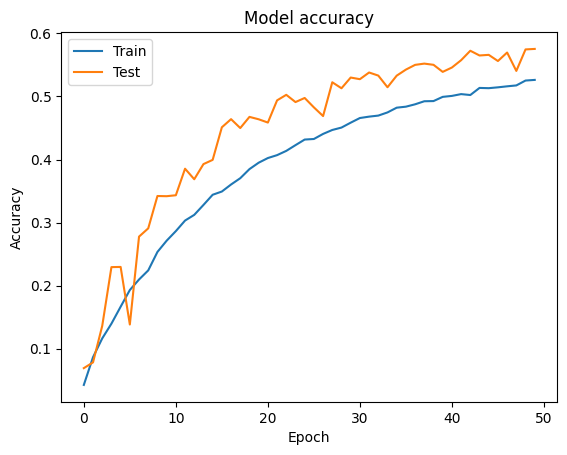

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

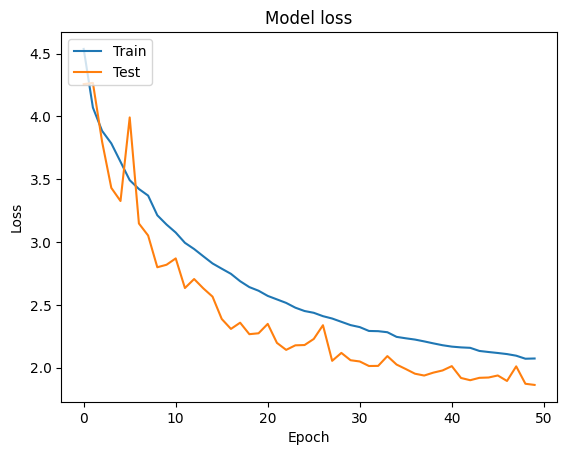

None


In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
print(plt.show())